In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime

In [25]:
import pandas as pd # You'll need to import pandas

# Replace with your Google Drive file ID which has public view access
# The new file ID has been inserted below:
file_id = "1dx9sdncdQ3dY4Fqsjo77rL2oaC3zw-fU"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
  # Read CSV directly into pandas
  data = pd.read_csv(url)

  # Show first few rows
  print(data.head())
except Exception as e:
    print(f"Error loading data: {e}")

  customer_id   first_name last_name  gender  age_group signup_date  country  \
0    CUST2353        Erica    Oliver  Female  Teenagers  29-06-2022   Canada   
1    CUST4463  Christopher     White    Male     Adults  24-08-2023    China   
2    CUST4512      Spencer    Foster    Male     Senior  18-07-2023  Germany   
3    CUST5711      Jessica    Harris    Male  Teenagers  22-08-2025   France   
4    CUST1296          Amy   Johnson  Female  Teenagers  23-03-2021   Brazil   

  product_id          product_name        category  quantity  unit_price  \
0    PROD108        Fitbit Versa 3     Electronics         3         229   
1    PROD103          Levi's Jeans         Apparel         4          59   
2    PROD111    Lego Star Wars Set            Toys         2          59   
3    PROD107          Dyson Vacuum  Home & Kitchen         4         399   
4    PROD105  Adidas Running Shoes         Apparel         1         110   

   order_id  order_date order_status    payment_method  rating

In [26]:
newdata = data.copy()

# EDA including visualization of e-commerce dataset

### 1. General analysis, to understand the userbase(based on their age, gender, country etc.)

In [36]:
customer_id = newdata.loc[:, ['customer_id']]

#Calculate number of unique customers
total_customer_count = newdata['customer_id'].nunique()
print(f"{total_customer_count} are unique customers")
customer_data = newdata.drop_duplicates(subset=['customer_id'])

#Calculate number of returned customer
duplicate_customer_id = customer_id.duplicated().sum()
print(f"{duplicate_customer_id} are multiple orders")

4327 are unique customers
5673 are multiple orders


/tmp/ipykernel_5889/1878029658.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_percentage.index, y=gender_percentage.values, palette='viridis')
/tmp/ipykernel_5889/1878029658.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_percentage.index, y=age_percentage.values, palette='plasma')


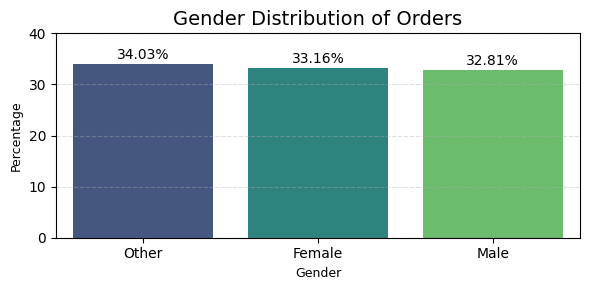

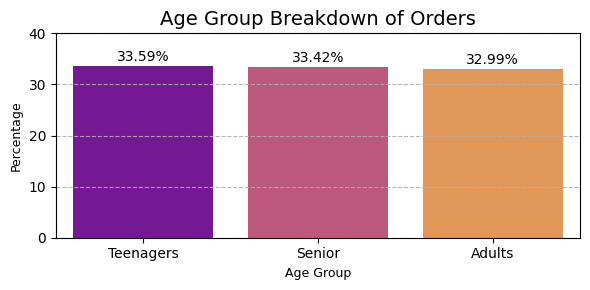

In [28]:
gender = newdata['gender']
gender_percentage = (gender.value_counts(normalize=True)*100)

age = newdata['age_group']
age_percentage = (age.value_counts(normalize=True)*100)

# --- Code for Gender Distribution Bar Chart ---
plt.figure(figsize=(6, 3))
sns.barplot(x=gender_percentage.index, y=gender_percentage.values, palette='viridis')
plt.title('Gender Distribution of Orders', fontsize=14)
plt.xlabel('Gender', fontsize=9)
plt.ylabel('Percentage', fontsize=9)
plt.ylim(0, 40) # Set y-axis limit for better scale comparison
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Add value labels on top of bars
for index, value in enumerate(gender_percentage.values):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center')

plt.tight_layout()

# --- Code for Age Group Distribution Bar Chart ---
plt.figure(figsize=(6, 3))
sns.barplot(x=age_percentage.index, y=age_percentage.values, palette='plasma')
plt.title('Age Group Breakdown of Orders', fontsize=14)
plt.xlabel('Age Group', fontsize=9)
plt.ylabel('Percentage', fontsize=9)
plt.ylim(0, 40)
plt.grid(axis='y', linestyle='--', alpha=0.9)

# Add value labels on top of bars
for index, value in enumerate(age_percentage.values):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center')

plt.tight_layout()

**The bar graphs represents:**
the userbase is very well-distrubted among all genders and age group!

/tmp/ipykernel_5889/1594027442.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


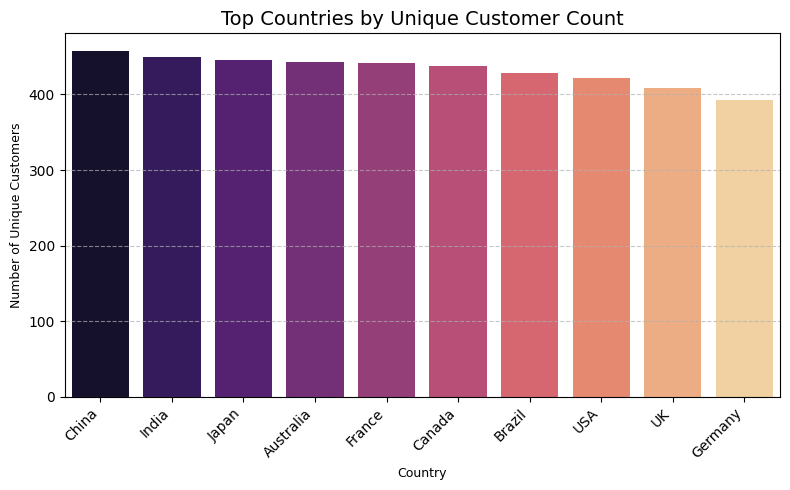

In [29]:
country_count = customer_data.groupby('country').size().sort_values(ascending=False).reset_index(name='unique_customer_count')
# Set a figure size for better readability
plt.figure(figsize=(8, 5))

# Create the bar plot using Seaborn
# x='country' and y='unique_customer_count' from the country_count DataFrame
sns.barplot(
    data=country_count,
    x='country',
    y='unique_customer_count',
    palette='magma' # A nice color palette
)

# Set the title and labels
plt.title('Top Countries by Unique Customer Count', fontsize=14)
plt.xlabel('Country', fontsize=9)
plt.ylabel('Number of Unique Customers', fontsize=9)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a grid for easier reading of the values
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()



This graph shows countries with highest number of customers are:
**China,**
**India,**
**Japan**

***

### 2. Product & Category Insights

Text(0.5, 1.0, 'Category Percentage Share')

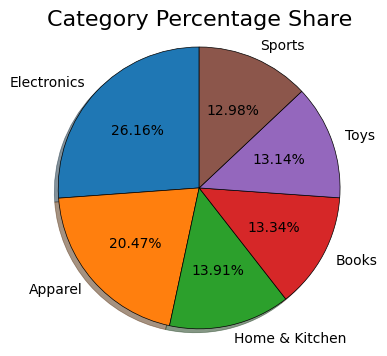

In [30]:
#Most selling categories
unique_category_count = newdata.groupby('category').size()
percentage_category_share =( unique_category_count / unique_category_count.sum() )*100

# 1. Convert the 'unique_category_count' Series to a DataFrame
df_to_plot = unique_category_count.to_frame(name='Count')

# 2. Add the 'percentage_category_share' Series as a new column
df_to_plot['Percentage'] = percentage_category_share

# 3. Convert the 'category' index into a regular column
df_to_plot = df_to_plot.reset_index()

# 4. Save the combined data to a CSV file
df_to_plot.to_csv('category_data_for_plot.csv', index=False)

df = pd.read_csv('category_data_for_plot.csv')
df_sorted = df.sort_values(by='Count', ascending=False)
sizes = df_sorted['Percentage']
labels = df_sorted['category']
plt.figure(figsize=(4, 4))

plt.pie(
    sizes,
    labels=labels,
    autopct='%1.2f%%',  # Format the percentage text: 1 digit before, 2 after decimal
    startangle=90,      # Start the first slice (the largest) at the top
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}, # Add a border to slices
    shadow=True
)

plt.axis('equal')
plt.title('Category Percentage Share', fontsize=16)


The pie-chart shows that electronics and apparel contribute nearly half the orders in respect to volume

/tmp/ipykernel_5889/3171063116.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_5889/3171063116.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


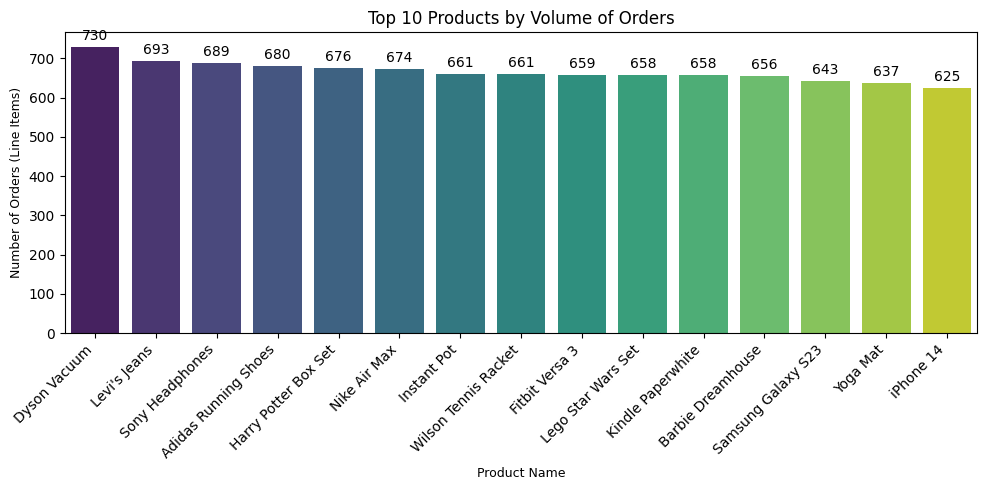

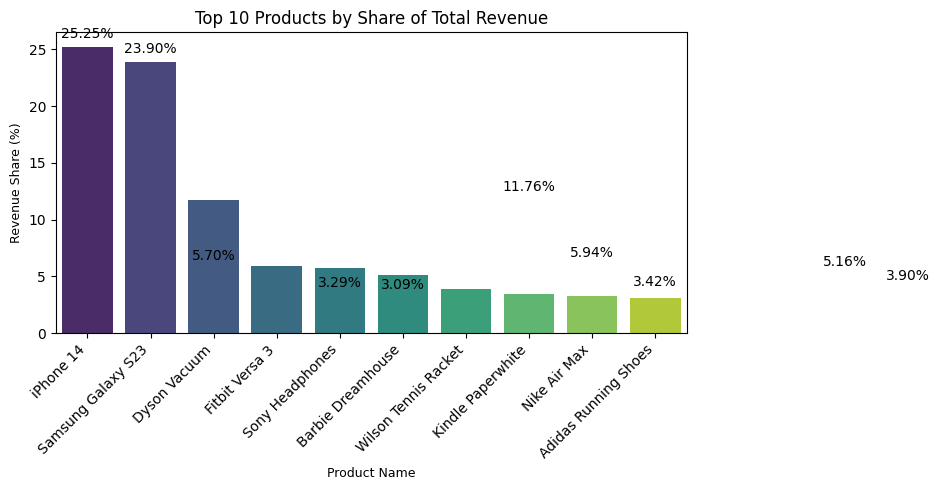

In [31]:
product_orders_count = newdata['product_id'].value_counts().reset_index()
product_orders_count.columns = ['product_id', 'Order_Count']

product_names = newdata[['product_id', 'product_name']].drop_duplicates()

top_products = pd.merge(
    product_orders_count,
    product_names,
    on='product_id',
    how='left'
)

top_10_products = top_products.sort_values(by='Order_Count', ascending=False).head(20)

newdata['revenue'] = newdata['quantity'] * newdata['unit_price']
product_revenue = newdata.groupby(['product_id', 'product_name'])['revenue'].sum().reset_index()
total_revenue_overall = newdata['revenue'].sum()
product_revenue['revenue_share'] = (product_revenue['revenue'] / total_revenue_overall) * 100
top_10_by_revenue_share = product_revenue.sort_values(by='revenue', ascending=False).head(10)

# --- Code to Create Bar Chart Visualization ---

plt.figure(figsize=(10, 5))

# Create the bar plot using seaborn
sns.barplot(
    data=top_10_products,
    x='product_name',
    y='Order_Count',
    palette='viridis' 
)

# Set the title and labels
plt.title('Top 10 Products by Volume of Orders', fontsize=12)
plt.xlabel('Product Name', fontsize=9)
plt.ylabel('Number of Orders (Line Items)', fontsize=9)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of the bars
for index, row in top_10_products.iterrows():
    # Adding 10 to the height for padding above the bar
    plt.text(index, row['Order_Count'] + 10, int(row['Order_Count']), ha='center', va='bottom', fontsize=10)

plt.tight_layout()


# --- Code to create the bar chart visualization ---
plt.figure(figsize=(10, 5))

# Create the bar plot using seaborn
sns.barplot(
    data=top_10_by_revenue_share,
    x='product_name',
    y='revenue_share',
    palette='viridis'
)

# Set the title and labels
plt.title('Top 10 Products by Share of Total Revenue', fontsize=12)
plt.xlabel('Product Name', fontsize=9)
plt.ylabel('Revenue Share (%)', fontsize=9)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of the bars
for index, row in top_10_by_revenue_share.iterrows():
    plt.text(index, row['revenue_share'] + 0.5, f'{row["revenue_share"]:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()

**Revenue is dominated by High-Value Electronics: The iPhone 14 (25.25%) and Samsung Galaxy S23 (23.90%) alone account for nearly half of the total top 10 revenue share, indicating they are high-priced items that are critical for overall sales value, despite having lower order volume ranks.**

**Order Volume is driven by Mid-Range Goods: The Dyson Vacuum is the most frequently ordered product (730 orders), but only ranks 3rd in revenue (5.70%). Other high-volume items like Levi's Jeans and the Harry Potter Box Set don't even make the top 10 revenue list, showing a group of popular, lower-priced items driving transaction count.**

**Significant Price Disparity: There is a clear separation between a product's popularity by volume and its contribution to revenue. For example, the iPhone 14 is the highest revenue generator (1st) but has one of the lowest order volumes (12th), confirming its premium price point.**

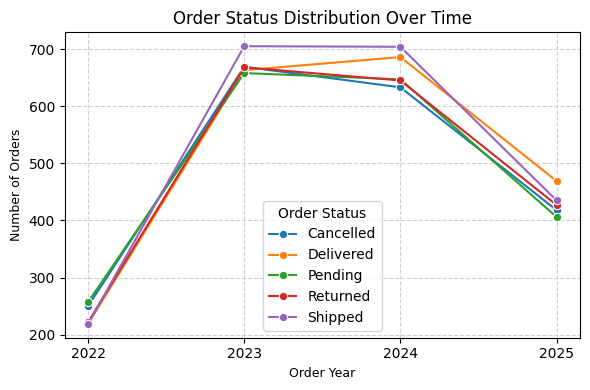

In [32]:
newdata['order_date'] = pd.to_datetime(newdata['order_date'], format='%d-%m-%Y', errors='coerce')
newdata['Order_Year'] = newdata['order_date'].dt.year

status_distribution_by_year = pd.crosstab(
    index=newdata['Order_Year'],
    columns=newdata['order_status'],
    rownames=['Year'],
    colnames=['Order Status']
)
status_long = status_distribution_by_year.stack().reset_index()
status_long.columns = ['Year', 'Status', 'Count']

# --- 3. Create the Line Chart ---
plt.figure(figsize=(6, 4))
sns.lineplot(
    data=status_long,
    x='Year',
    y='Count',
    hue='Status',
    marker='o'
)

# Set chart title and labels
plt.title('Order Status Distribution Over Time', fontsize=12)
plt.xlabel('Order Year', fontsize=9)
plt.ylabel('Number of Orders', fontsize=9)

# Ensure X-axis ticks are integers for years
plt.xticks(status_long['Year'].unique())

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Order Status')
plt.tight_layout()

'''**Growth Phase: 2022 → 2023 saw the biggest expansion.**

**2023 → 2024 sales remained steady.**

**2025 shows a downward trend (maybe partial-year data).**

**Status Trends:**

**Delivered + Shipped consistently dominate (healthy fulfillment).**

**Cancelled & Returned remain notable but not overwhelming (some dissatisfaction).**'''

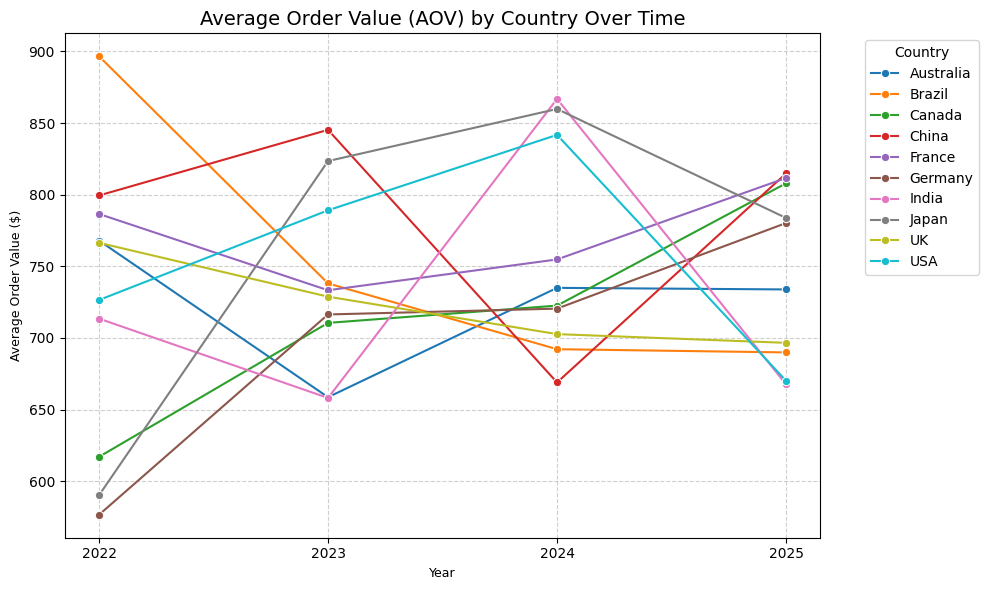

In [35]:
newdata['order_total'] = newdata['quantity'] * newdata['unit_price']
order_revenue = newdata.groupby(['country', 'order_id'])['order_total'].sum().reset_index()

order_info = newdata[['order_id', 'order_date']].drop_duplicates()
order_info['order_year'] = pd.to_datetime(order_info['order_date'], format='%d-%m-%Y', errors='coerce').dt.year

aov_df = pd.merge(order_revenue, order_info, on='order_id', how='left')

aov_by_country_year = (
    aov_df.groupby(['country', 'order_year'])['order_total']
    .mean()
    .round(2)
    .reset_index(name='AOV')
)

# --- 2. Create the Line Chart ---
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=aov_by_country_year,
    x='order_year',
    y='AOV',
    hue='country',
    marker='o'
)

# Set chart title and labels
plt.title('Average Order Value (AOV) by Country Over Time', fontsize=14)
plt.xlabel('Year', fontsize=9)
plt.ylabel('Average Order Value ($)', fontsize=9)

# Ensure x-axis ticks are integers for years
plt.xticks(sorted(aov_by_country_year['order_year'].unique()))

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

***

### Revenue & Payments

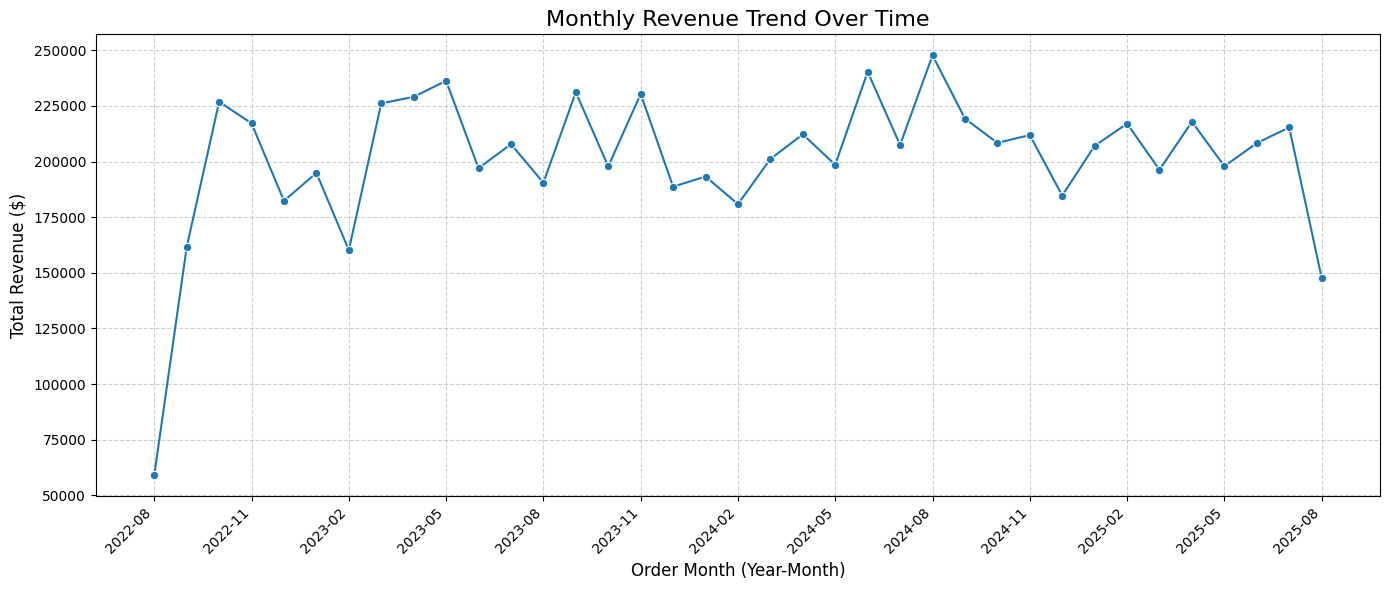

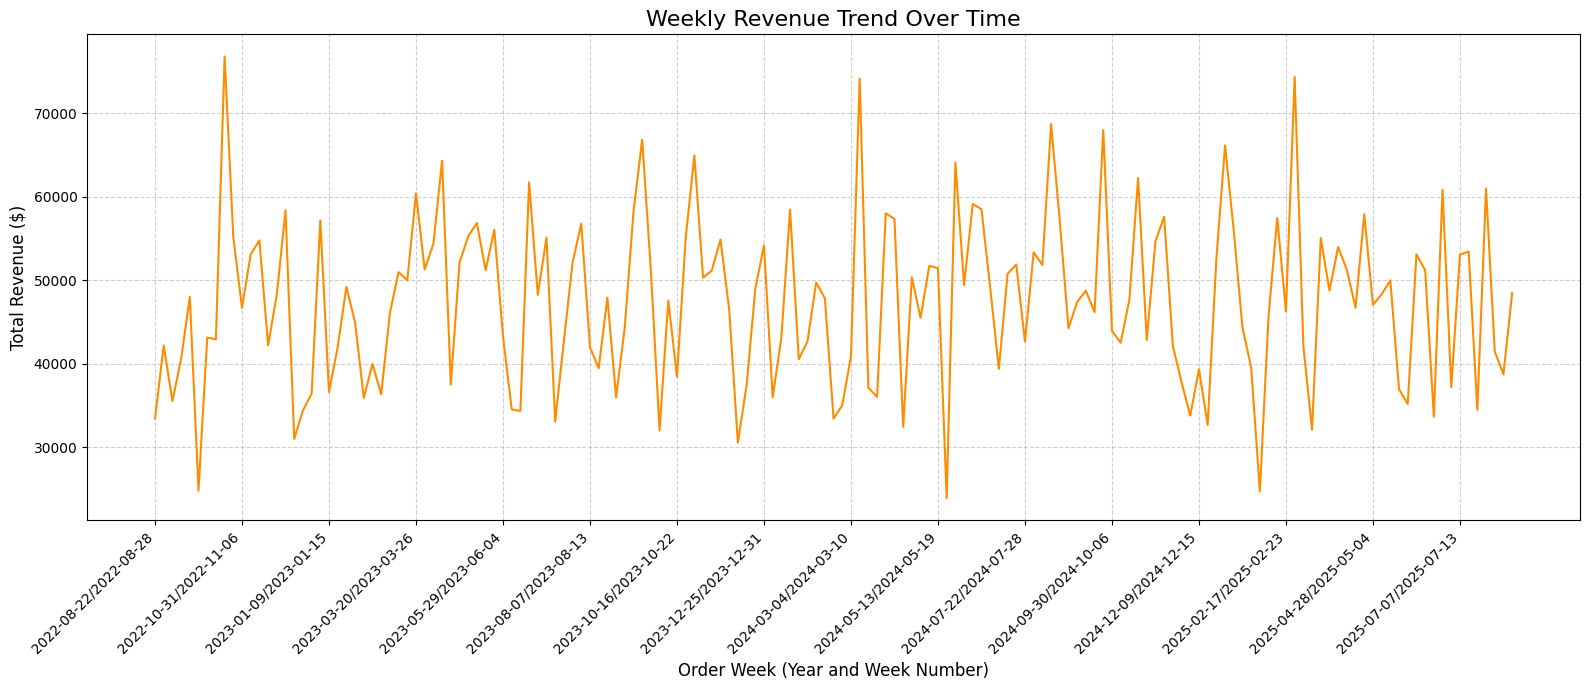

In [40]:
newdata['revenue'] = newdata['quantity'] * newdata['unit_price']

# Convert 'order_date' to datetime
newdata['order_date'] = pd.to_datetime(newdata['order_date'], format='%d-%m-%Y', errors='coerce')

# Extract the Year-Month string for grouping (e.g., '2023-01')
newdata['order_month'] = newdata['order_date'].dt.to_period('M').astype(str)

# Group by month and sum the revenue
monthly_revenue = newdata.groupby('order_month')['revenue'].sum().reset_index()

plt.figure(figsize=(14, 6))

# Use seaborn for the line plot
sns.lineplot(
    data=monthly_revenue,
    x='order_month',
    y='revenue',
    marker='o',
    color='#1f77b4' # A nice blue color
)

# Set chart title and labels
plt.title('Monthly Revenue Trend Over Time', fontsize=16)
plt.xlabel('Order Month (Year-Month)', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
x_ticks = monthly_revenue['order_month'].tolist()
plt.xticks(x_ticks[::3], rotation=45, ha='right')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

newdata['revenue'] = newdata['quantity'] * newdata['unit_price']

# Convert 'order_date' to datetime
newdata['order_date'] = pd.to_datetime(newdata['order_date'], format='%d-%m-%Y', errors='coerce')

# Extract the Year-Week period for grouping (e.g., '2023W01')
# Using 'W' gives a consistent weekly period grouping
newdata['order_week'] = newdata['order_date'].dt.to_period('W').astype(str)

# Group by week and sum the revenue
weekly_revenue = newdata.groupby('order_week')['revenue'].sum().reset_index()


# --- 3. Create the Line Chart Visualization ---
plt.figure(figsize=(16, 7))

# Use seaborn for the line plot
sns.lineplot(
    data=weekly_revenue,
    x='order_week',
    y='revenue',
    color='darkorange', # A distinct color
    linewidth=1.5
)

# Set chart title and labels
plt.title('Weekly Revenue Trend Over Time', fontsize=16)
plt.xlabel('Order Week (Year and Week Number)', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)

# Set x-axis ticks to show only every 10th week to avoid label overlap
x_ticks = weekly_revenue['order_week'].tolist()
plt.xticks(x_ticks[::10], rotation=45, ha='right', fontsize=10)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

**The revenue stays flat, no clear indication of upward or downward trend.**

**Key takeaways...**
1. Monthly revenue peaked at August 2024, greater than $250,000.
2. Monthly revenue shows a sharp increase after August 2022.
3. Althogh there were few peaks in revenue, the company showed no clear sign of consistent growth.
4. Monthly chart averages out, hiding weekly trend patterns.

payment_method_yearly_trend_line_chart.png


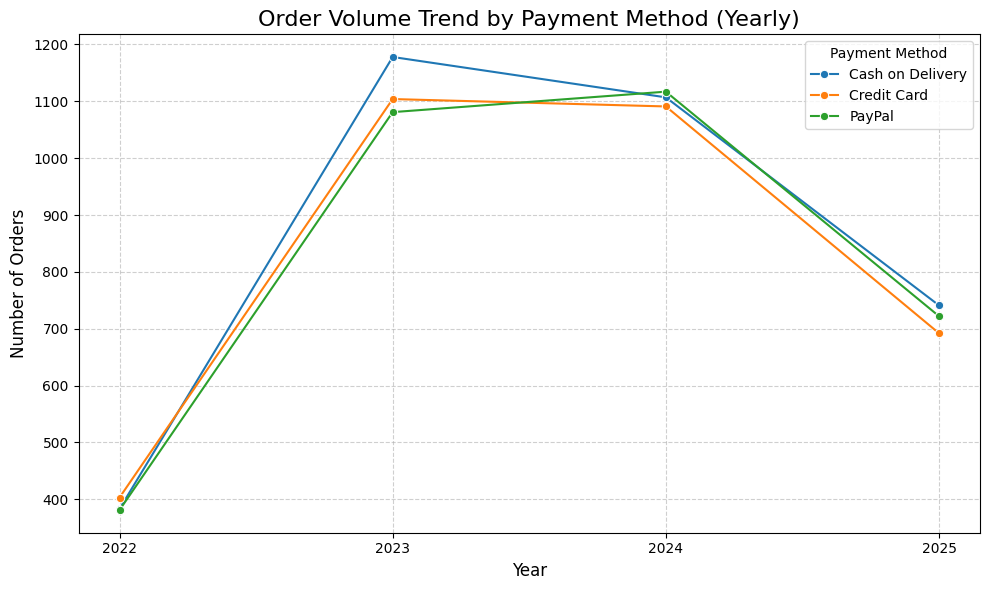

In [42]:
newdata['order_date'] = pd.to_datetime(newdata['order_date'], format='%d-%m-%Y', errors='coerce')

# Extract the Year
newdata['Order_Year'] = newdata['order_date'].dt.year

# Calculate the counts using crosstab (Wide Format)
payment_method_by_year = pd.crosstab(
    index=newdata['Order_Year'],
    columns=newdata['payment_method']
)

# --- 2. Reshape and Visualize ---

# Convert to Long Format for plotting
payment_method_long = payment_method_by_year.stack().reset_index()
payment_method_long.columns = ['Year', 'Payment_Method', 'Order_Count']
# Create the Line Chart Visualization
plt.figure(figsize=(10, 6))

# Use seaborn for the line plot, setting 'Payment_Method' as the hue
sns.lineplot(
    data=payment_method_long,
    x='Year',
    y='Order_Count',
    hue='Payment_Method',
    marker='o'
)

# Set chart title and labels
plt.title('Order Volume Trend by Payment Method (Yearly)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

# Ensure x-axis ticks are integers for years
plt.xticks(sorted(payment_method_long['Year'].unique()))

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Payment Method')
plt.tight_layout()

# Save the plot
plt.savefig('payment_method_yearly_trend_line_chart.png')
print("payment_method_yearly_trend_line_chart.png")